In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
import numpy as np

In [68]:
df1 = pd.read_csv('Datasets/CDC_Diabetes_Health_Indicators.csv')
df2 = pd.read_csv('Datasets/aids_clinical_trials_study_175.csv')
df3 = pd.read_csv('Datasets/glioma_grading_clinical_and_mutation.csv')
df4 = pd.read_csv('Datasets/breast_cancer_wisconsin_diagnostic.csv')
df5 = pd.read_csv('Datasets/secondary_mushrooms.csv')

df3 = pd.get_dummies(df3, columns=['Race'], drop_first=True)

le = LabelEncoder()
df4['Diagnosis'] = le.fit_transform(df4['Diagnosis'])
print(df4['Diagnosis'].unique())

for col in df5.select_dtypes(include=['object']).columns:
    df5[col] = le.fit_transform(df5[col])
    
scaler = StandardScaler()

[1 0]


In [72]:
x = df1.drop(columns=['Diabetes_binary'])
y = df1['Diabetes_binary']

x = scaler.fit_transform(x)

In [74]:
x = df2.drop(columns=['cid'])
y = df2['cid']

x = scaler.fit_transform(x)

In [76]:
x = df3.drop(columns=['Grade'])
y = df3['Grade']

x = scaler.fit_transform(x)

In [78]:
x = df4.drop(columns=['Diagnosis'])
y = df4['Diagnosis']

x = scaler.fit_transform(x)

In [81]:
x = df5.drop(columns=['class'])
y = df5['class']

x = scaler.fit_transform(x)

# **!!**

In [70]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores, f1_scores, roc_auc_scores = [], [], []
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# **DF1**

Average Accuracy over 10x10 CV: 0.8635
Average F1 Score over 10x10 CV: 0.2409
Average ROC-AUC over 10x10 CV: 0.8220


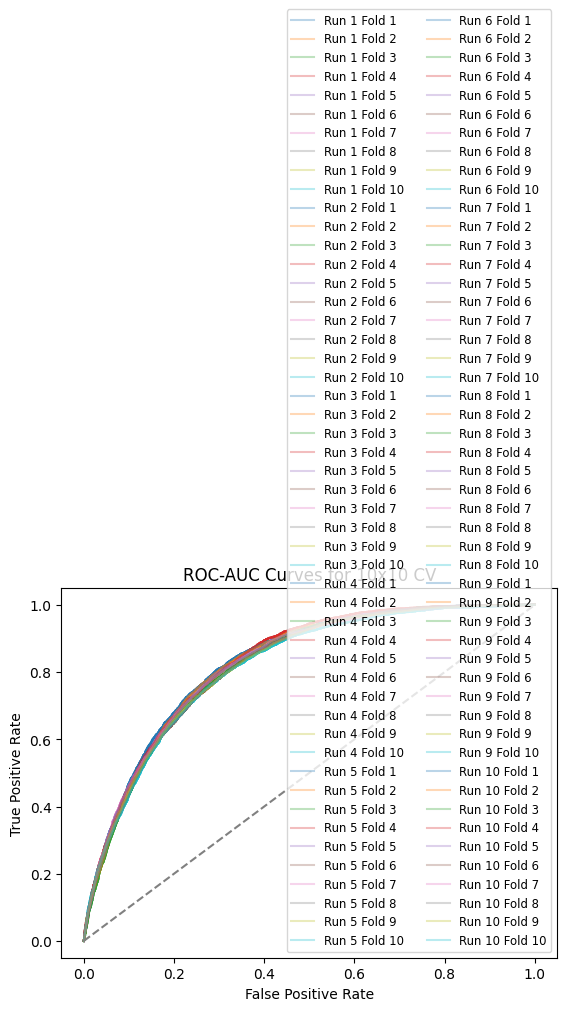

In [73]:
for run in range(10):  # Repeat 10 times
    fold_accuracies, fold_f1s, fold_rocs = [], [], []
    all_fpr, all_tpr = [], []
    
    for train_idx, test_idx in kf.split(x, y):
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        
        model = LogisticRegression()
        model.fit(x_train, y_train)
        
        y_pred = model.predict(x_test)
        y_prob = model.predict_proba(x_test)[:, 1]
        
        fold_accuracies.append(accuracy_score(y_test, y_pred))
        fold_f1s.append(f1_score(y_test, y_pred))
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        fold_rocs.append(auc(fpr, tpr))
        all_fpr.append(fpr)
        all_tpr.append(tpr)
    
    accuracy_scores.append(np.mean(fold_accuracies))
    f1_scores.append(np.mean(fold_f1s))
    roc_auc_scores.append(np.mean(fold_rocs))
    
    # Plot ROC Curve for this run
    for i in range(10):
        plt.plot(all_fpr[i], all_tpr[i], alpha=0.3, label=f'Run {run+1} Fold {i+1}')

# Final Evaluation Metrics
print(f'Average Accuracy over 10x10 CV: {np.mean(accuracy_scores):.4f}')
print(f'Average F1 Score over 10x10 CV: {np.mean(f1_scores):.4f}')
print(f'Average ROC-AUC over 10x10 CV: {np.mean(roc_auc_scores):.4f}')

# Plot Formatting
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for 10x10 CV')
plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.show()

# **DF2**

Average Accuracy over 10x10 CV: 0.8646
Average F1 Score over 10x10 CV: 0.3903
Average ROC-AUC over 10x10 CV: 0.8450


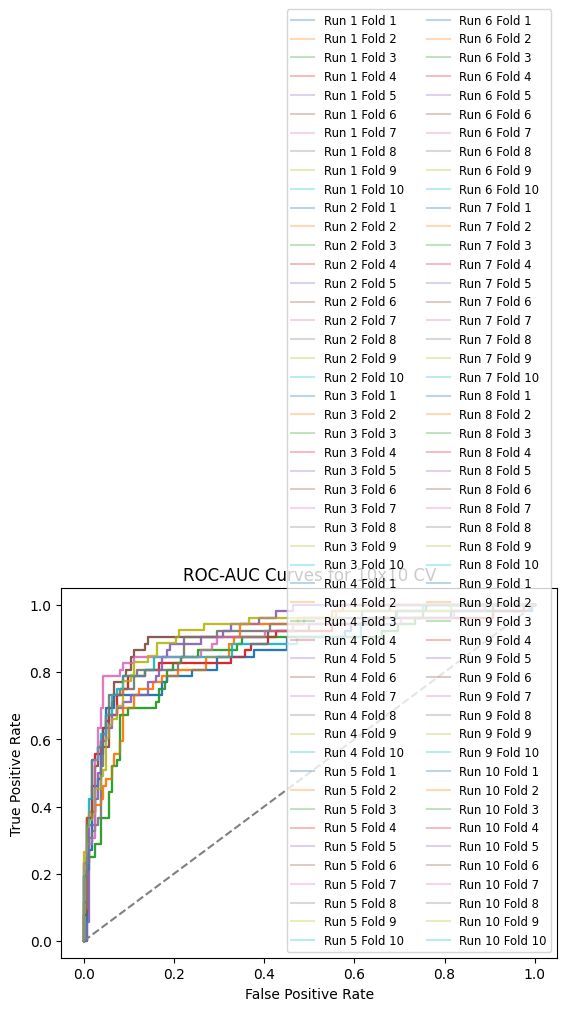

In [75]:
for run in range(10):  # Repeat 10 times
    fold_accuracies, fold_f1s, fold_rocs = [], [], []
    all_fpr, all_tpr = [], []
    
    for train_idx, test_idx in kf.split(x, y):
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        
        model = LogisticRegression()
        model.fit(x_train, y_train)
        
        y_pred = model.predict(x_test)
        y_prob = model.predict_proba(x_test)[:, 1]
        
        fold_accuracies.append(accuracy_score(y_test, y_pred))
        fold_f1s.append(f1_score(y_test, y_pred))
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        fold_rocs.append(auc(fpr, tpr))
        all_fpr.append(fpr)
        all_tpr.append(tpr)
    
    accuracy_scores.append(np.mean(fold_accuracies))
    f1_scores.append(np.mean(fold_f1s))
    roc_auc_scores.append(np.mean(fold_rocs))
    
    # Plot ROC Curve for this run
    for i in range(10):
        plt.plot(all_fpr[i], all_tpr[i], alpha=0.3, label=f'Run {run+1} Fold {i+1}')

# Final Evaluation Metrics
print(f'Average Accuracy over 10x10 CV: {np.mean(accuracy_scores):.4f}')
print(f'Average F1 Score over 10x10 CV: {np.mean(f1_scores):.4f}')
print(f'Average ROC-AUC over 10x10 CV: {np.mean(roc_auc_scores):.4f}')

# Plot Formatting
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for 10x10 CV')
plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.show()

# **DF3**

Average Accuracy over 10x10 CV: 0.8654
Average F1 Score over 10x10 CV: 0.5055
Average ROC-AUC over 10x10 CV: 0.8633


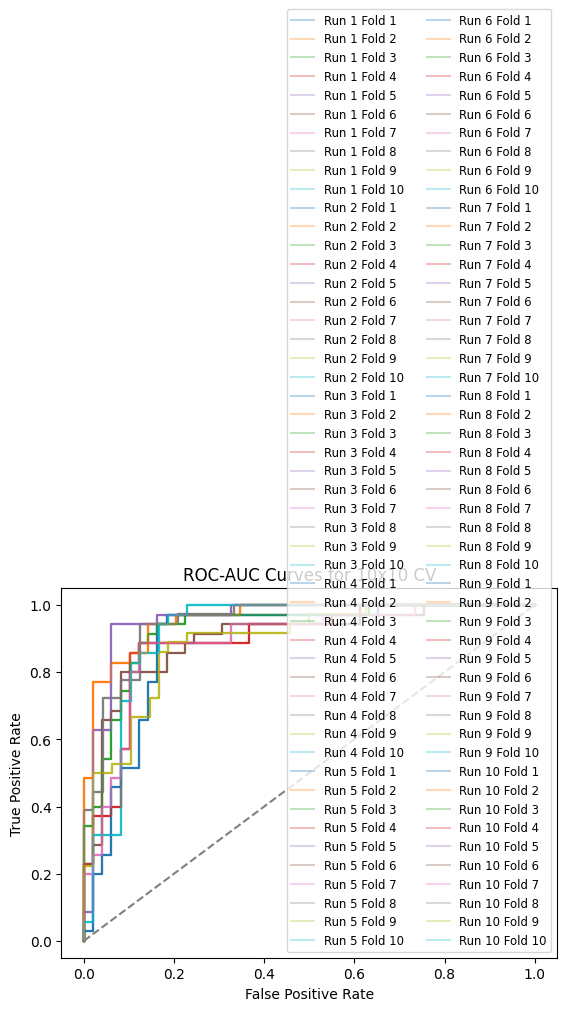

In [77]:
for run in range(10):  # Repeat 10 times
    fold_accuracies, fold_f1s, fold_rocs = [], [], []
    all_fpr, all_tpr = [], []
    
    for train_idx, test_idx in kf.split(x, y):
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        
        model = LogisticRegression()
        model.fit(x_train, y_train)
        
        y_pred = model.predict(x_test)
        y_prob = model.predict_proba(x_test)[:, 1]
        
        fold_accuracies.append(accuracy_score(y_test, y_pred))
        fold_f1s.append(f1_score(y_test, y_pred))
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        fold_rocs.append(auc(fpr, tpr))
        all_fpr.append(fpr)
        all_tpr.append(tpr)
    
    accuracy_scores.append(np.mean(fold_accuracies))
    f1_scores.append(np.mean(fold_f1s))
    roc_auc_scores.append(np.mean(fold_rocs))
    
    # Plot ROC Curve for this run
    for i in range(10):
        plt.plot(all_fpr[i], all_tpr[i], alpha=0.3, label=f'Run {run+1} Fold {i+1}')

# Final Evaluation Metrics
print(f'Average Accuracy over 10x10 CV: {np.mean(accuracy_scores):.4f}')
print(f'Average F1 Score over 10x10 CV: {np.mean(f1_scores):.4f}')
print(f'Average ROC-AUC over 10x10 CV: {np.mean(roc_auc_scores):.4f}')

# Plot Formatting
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for 10x10 CV')
plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.show()

# **DF4**

Average Accuracy over 10x10 CV: 0.8877
Average F1 Score over 10x10 CV: 0.5981
Average ROC-AUC over 10x10 CV: 0.8896


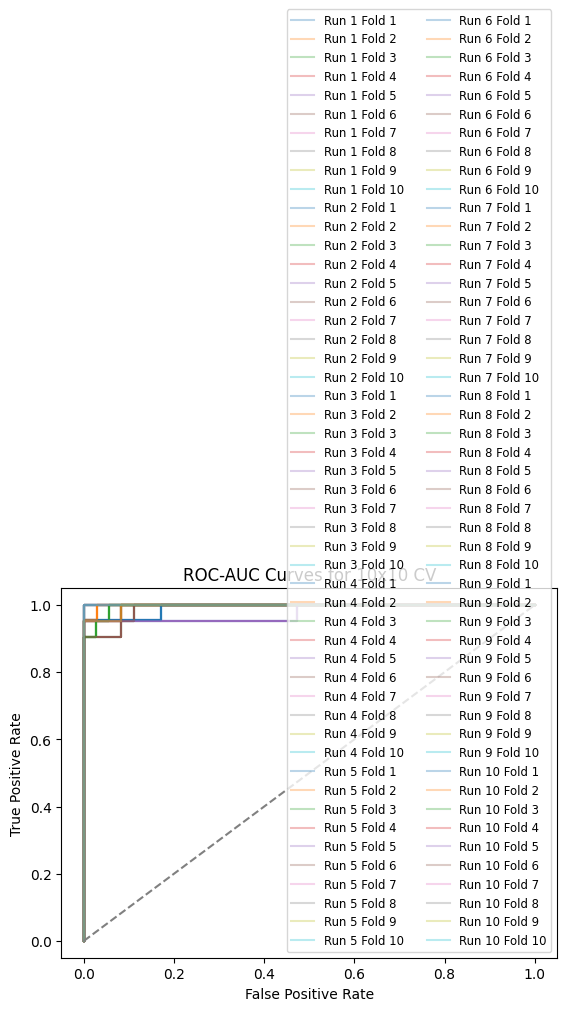

In [79]:
for run in range(10):  # Repeat 10 times
    fold_accuracies, fold_f1s, fold_rocs = [], [], []
    all_fpr, all_tpr = [], []
    
    for train_idx, test_idx in kf.split(x, y):
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        
        model = LogisticRegression()
        model.fit(x_train, y_train)
        
        y_pred = model.predict(x_test)
        y_prob = model.predict_proba(x_test)[:, 1]
        
        fold_accuracies.append(accuracy_score(y_test, y_pred))
        fold_f1s.append(f1_score(y_test, y_pred))
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        fold_rocs.append(auc(fpr, tpr))
        all_fpr.append(fpr)
        all_tpr.append(tpr)
    
    accuracy_scores.append(np.mean(fold_accuracies))
    f1_scores.append(np.mean(fold_f1s))
    roc_auc_scores.append(np.mean(fold_rocs))
    
    # Plot ROC Curve for this run
    for i in range(10):
        plt.plot(all_fpr[i], all_tpr[i], alpha=0.3, label=f'Run {run+1} Fold {i+1}')

# Final Evaluation Metrics
print(f'Average Accuracy over 10x10 CV: {np.mean(accuracy_scores):.4f}')
print(f'Average F1 Score over 10x10 CV: {np.mean(f1_scores):.4f}')
print(f'Average ROC-AUC over 10x10 CV: {np.mean(roc_auc_scores):.4f}')

# Plot Formatting
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for 10x10 CV')
plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.show()

# **DF5**

Average Accuracy over 10x10 CV: 0.8484
Average F1 Score over 10x10 CV: 0.6160
Average ROC-AUC over 10x10 CV: 0.8568


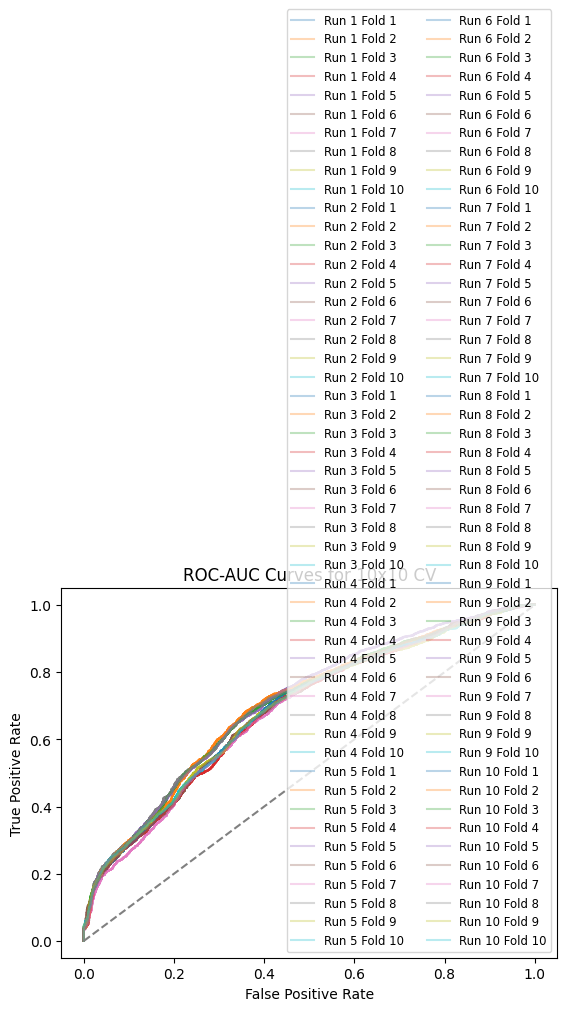

In [82]:
for run in range(10):  # Repeat 10 times
    fold_accuracies, fold_f1s, fold_rocs = [], [], []
    all_fpr, all_tpr = [], []
    
    for train_idx, test_idx in kf.split(x, y):
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        
        model = LogisticRegression()
        model.fit(x_train, y_train)
        
        y_pred = model.predict(x_test)
        y_prob = model.predict_proba(x_test)[:, 1]
        
        fold_accuracies.append(accuracy_score(y_test, y_pred))
        fold_f1s.append(f1_score(y_test, y_pred))
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        fold_rocs.append(auc(fpr, tpr))
        all_fpr.append(fpr)
        all_tpr.append(tpr)
    
    accuracy_scores.append(np.mean(fold_accuracies))
    f1_scores.append(np.mean(fold_f1s))
    roc_auc_scores.append(np.mean(fold_rocs))
    
    # Plot ROC Curve for this run
    for i in range(10):
        plt.plot(all_fpr[i], all_tpr[i], alpha=0.3, label=f'Run {run+1} Fold {i+1}')

# Final Evaluation Metrics
print(f'Average Accuracy over 10x10 CV: {np.mean(accuracy_scores):.4f}')
print(f'Average F1 Score over 10x10 CV: {np.mean(f1_scores):.4f}')
print(f'Average ROC-AUC over 10x10 CV: {np.mean(roc_auc_scores):.4f}')

# Plot Formatting
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for 10x10 CV')
plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.show()